In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
# FILL OUT: For faster processing
num_cpu = 4

# Load Data

In [5]:
gr_metadata = pd.read_csv('official_goodreads_metadata.csv')
gr_metadata

,asin,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,...,publisher,num_pages,format,description,cleaned_description,gr_countDes_before,gr_countDes_after,cleaned_genres,gr_countText_before,gr_countText_after
0,000100039X,4.23,186297,163625,5535,220088,196528,8847,2010.0,1.0,...,Rupa & Co,127.0,Paperback,"Kahlil Gibran's masterpiece, The Prophet, is o...",tahsil vibrants masterpiece prophet one belove...,106.0,66.0,"poetry, fiction, non-fiction",42320,17834
1,0001053655,4.08,16,33,6,676,1552,85,1997.0,NaN,...,HarperCollins,268.0,Hardcover,NaN,NaN,NaN,NaN,"history, historical fiction, biography, non-fi...",158,75
2,0001061240,4.62,10,22,2,221,603,36,1959.0,12.0,...,Western Publishing Company,324.0,Hardcover,NaN,NaN,NaN,NaN,"poetry, children",49,18
3,000161102X,3.86,33,74,4,2929,5786,75,NaN,NaN,...,NaN,190.0,NaN,The snobby girls at the fashionable boarding s...,snobby girl fashionable board school ridicule ...,47.0,25.0,"children, fiction, young-adult, history, histo...",130,61
4,0001711296,4.29,604,1319,48,738,1564,65,NaN,NaN,...,Random House,63.0,NaN,NaN,NaN,NaN,NaN,"children, fiction, poetry, fantasy, paranormal",257,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0312953240,3.80,75,178,8,87,201,8,1995.0,7.0,...,St. Martin's Paperbacks,570.0,Paperback,Recounts the search for and trial of a serial ...,recount search trial serial killer target offr...,41.0,20.0,"mystery, thriller, crime, non-fiction",219,94
37229,0312955138,3.38,27,75,3,29,81,4,1995.0,9.0,...,St. Martin's Paperbacks,320.0,Paperback,"Jill Coit was a voluptuous, dark-skinned beaut...",jill coit voluptuous darkskinned beauty sultry...,156.0,82.0,"mystery, thriller, crime, non-fiction",125,52
37230,0312955154,3.36,52,94,5,56,101,5,1995.0,10.0,...,St. Martin's Press,NaN,Paperback,Paleontologist Cameron Malone has discovered a...,paleontologist cameron alone discover yearly m...,48.0,33.0,"mystery, thriller, crime, fiction",362,184
37231,0312956878,3.78,57,189,3,59,193,4,1995.0,10.0,...,St. Martin's Paperbacks,608.0,Paperback,A KILLER WITHOUT REDEMPTION...\nIn broad dayli...,killer without redemption broad daylight backw...,187.0,103.0,"mystery, thriller, crime, non-fiction",152,76


In [6]:
am_metadata = pd.read_csv('official_amazon_metadata.csv')
am_metadata

,asin,average,rating_count,text_reviews_count,genres,rank,verifiedTrue_count,Format,am_countText_before,am_countText_after
0,0001713353,4.83,54,54,"Childrens Books, Literature & Fiction",1461315,36,"Paperback, Hardcover",2362,1037
1,0001061240,4.87,45,45,"Childrens Books, Literature & Fiction",321557,30,Hardcover,3085,1326
2,0001711296,4.44,107,107,Literature & Fiction,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574
3,0002007649,3.37,19,19,"Science & Math, Chemistry",9799524,3,"Kindle Edition, Paperback, Hardcover",5668,2810
4,0001716069,4.61,59,59,"Literature & Fiction, Poetry",3841172,44,"Kindle Edition, Paperback, Hardcover",3081,1457
...,...,...,...,...,...,...,...,...,...,...
37228,0312943636,4.17,24,24,"Literature & Fiction, Fiction",2583900,9,"Mass Market Paperback, Kindle Edition",5228,2508
37229,0312953038,4.00,27,27,"Romance, Historical",553268,12,"Mass Market Paperback, Kindle Edition, Pape...",3184,1420
37230,0312955154,3.29,14,14,"Literature & Fiction, Fiction",3412599,4,"Kindle Edition, Paperback",1456,683
37231,0312956878,3.33,15,15,"Biographies & Memoirs, True Crime",2606128,9,"Mass Market Paperback, Hardcover",968,450


# Find outliers & anomalies

In [7]:
gr_metadata.isnull().sum()

asin                           0
average_rating                 0
ratings_count                  0
reviews_count                  0
text_reviews_count             0
total_ratings_count            0
total_reviews_count            0
total_text_reviews_count       0
publication_year            1445
publication_month           2012
publication_day             2212
publisher                   1488
num_pages                   1630
format                      1535
description                 1027
cleaned_description         1748
gr_countDes_before          1027
gr_countDes_after           1748
cleaned_genres               199
gr_countText_before            0
gr_countText_after             0
dtype: int64

In [8]:
am_metadata.isnull().sum()

asin                    0
average                 0
rating_count            0
text_reviews_count      0
genres                  0
rank                    0
verifiedTrue_count      0
Format                 49
am_countText_before     0
am_countText_after      0
dtype: int64

In [9]:
gr_metadata.describe()

,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,publication_day,num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after
count,37233.000000,3.723300e+04,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04,37233.000000,35788.000000,35221.000000,35021.000000,35603.000000,36206.000000,35485.000000,3.723300e+04,37233.000000
mean,3.873311,2.141833e+03,4.211693e+03,145.747267,1.147746e+04,1.963290e+04,614.953992,2005.668772,6.367764,13.958339,322.277757,160.689085,89.978442,3.233221e+03,1429.169957
std,0.306148,2.213376e+04,2.996176e+04,974.148611,8.537788e+04,1.153654e+05,3121.161743,8.987800,3.339121,10.365574,201.544695,92.759441,52.634720,1.502964e+04,6492.465045
min,2.320000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,0.000000,1900.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000
25%,3.690000,5.900000e+01,1.500000e+02,9.000000,2.270000e+02,6.300000e+02,27.000000,2002.000000,4.000000,4.000000,227.000000,99.000000,55.000000,1.480000e+02,68.000000
50%,3.890000,1.860000e+02,5.060000e+02,24.000000,8.210000e+02,2.103000e+03,83.000000,2008.000000,6.000000,13.000000,307.000000,147.000000,81.000000,5.740000e+02,260.000000
75%,4.080000,6.900000e+02,1.797000e+03,75.000000,3.416000e+03,7.850000e+03,292.000000,2012.000000,9.000000,24.000000,384.000000,205.000000,115.000000,2.058000e+03,928.000000
max,5.000000,2.056193e+06,2.238009e+06,68752.000000,4.718437e+06,5.684376e+06,152766.000000,2019.000000,12.000000,31.000000,9998.000000,2124.000000,1250.000000,1.001655e+06,443150.000000


In [10]:
am_metadata.describe()

,average,rating_count,text_reviews_count,rank,verifiedTrue_count,am_countText_before,am_countText_after
count,37233.000000,37233.000000,37233.000000,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04
mean,4.261219,152.651680,152.615798,1.563020e+06,104.396879,1.371004e+04,6.490044e+03
std,0.422799,702.459338,702.255076,2.092905e+06,569.410575,4.245893e+04,1.970582e+04
min,1.080000,6.000000,6.000000,2.300000e+01,0.000000,7.900000e+01,4.900000e+01
25%,4.040000,22.000000,22.000000,3.022940e+05,11.000000,2.395000e+03,1.152000e+03
50%,4.330000,43.000000,43.000000,9.232760e+05,24.000000,4.956000e+03,2.387000e+03
75%,4.570000,107.000000,107.000000,1.986080e+06,66.000000,1.170400e+04,5.585000e+03
max,5.000000,44956.000000,44947.000000,2.154444e+07,39851.000000,2.384912e+06,1.082212e+06


Recall from EDA, outliers are: <br/>
1. min from am_metadata.average <br/>
2. max from gr_metadata.num_pages <br/>
3. 2 min from am_metadata.average_rating - gr_metadata.average

In [11]:
# Manually check data points w/ 0 total_text_reviews_count
gr_metadata[gr_metadata['total_text_reviews_count'] == 0]

,asin,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,...,publisher,num_pages,format,description,cleaned_description,gr_countDes_before,gr_countDes_after,cleaned_genres,gr_countText_before,gr_countText_after
24788,0205739415,2.92,8,32,0,12,46,0,2010.0,9.0,...,Longman Publishing Group,544.0,Paperback,"""Technical Communication Strategies for Today ...",technical communication strategy today offer s...,147.0,92.0,non-fiction,96,40
26677,0300084323,4.35,23,86,0,23,86,0,2001.0,3.0,...,Yale University Press,816.0,Hardcover,The Holocaust has been the subject of countles...,holocaust subject countless book work art memo...,214.0,134.0,"history, historical fiction, biography, fictio...",2,2


In [12]:
# Change those values to 1 (inconsistent values by GR)
gr_metadata.loc[gr_metadata['asin'] == '0205739415', 'total_text_reviews_count'] = 1
gr_metadata.loc[gr_metadata['asin'] == '0300084323', 'total_text_reviews_count'] = 1

In [13]:
gr_metadata.describe()

,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,publication_day,num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after
count,37233.000000,3.723300e+04,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04,37233.000000,35788.000000,35221.000000,35021.000000,35603.000000,36206.000000,35485.000000,3.723300e+04,37233.000000
mean,3.873311,2.141833e+03,4.211693e+03,145.747267,1.147746e+04,1.963290e+04,614.954046,2005.668772,6.367764,13.958339,322.277757,160.689085,89.978442,3.233221e+03,1429.169957
std,0.306148,2.213376e+04,2.996176e+04,974.148611,8.537788e+04,1.153654e+05,3121.161732,8.987800,3.339121,10.365574,201.544695,92.759441,52.634720,1.502964e+04,6492.465045
min,2.320000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,1.000000,1900.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000
25%,3.690000,5.900000e+01,1.500000e+02,9.000000,2.270000e+02,6.300000e+02,27.000000,2002.000000,4.000000,4.000000,227.000000,99.000000,55.000000,1.480000e+02,68.000000
50%,3.890000,1.860000e+02,5.060000e+02,24.000000,8.210000e+02,2.103000e+03,83.000000,2008.000000,6.000000,13.000000,307.000000,147.000000,81.000000,5.740000e+02,260.000000
75%,4.080000,6.900000e+02,1.797000e+03,75.000000,3.416000e+03,7.850000e+03,292.000000,2012.000000,9.000000,24.000000,384.000000,205.000000,115.000000,2.058000e+03,928.000000
max,5.000000,2.056193e+06,2.238009e+06,68752.000000,4.718437e+06,5.684376e+06,152766.000000,2019.000000,12.000000,31.000000,9998.000000,2124.000000,1250.000000,1.001655e+06,443150.000000


# Prepare Data

Select numerical features w/o null values

In [14]:
am_gr_metadata = pd.merge(gr_metadata[['asin', 'average_rating', 'total_ratings_count', 'total_text_reviews_count', 
                                       'publication_year', 'publication_month', 'publication_day', 'format', 
                                       'cleaned_description', 'gr_countDes_before', 'gr_countDes_after', 'cleaned_genres',
                                       'gr_countText_before', 'gr_countText_after']], 
                          am_metadata, how='inner', on='asin')
am_gr_metadata

,asin,average_rating,total_ratings_count,total_text_reviews_count,publication_year,publication_month,publication_day,format,cleaned_description,gr_countDes_before,...,gr_countText_after,average,rating_count,text_reviews_count,genres,rank,verifiedTrue_count,Format,am_countText_before,am_countText_after
0,000100039X,4.23,220088,8847,2010.0,1.0,1.0,Paperback,tahsil vibrants masterpiece prophet one belove...,106.0,...,17834,4.64,1453,1453,"Literature & Fiction, Poetry",1810945,1130,NaN,69909,31772
1,0001053655,4.08,676,85,1997.0,NaN,NaN,Hardcover,NaN,NaN,...,75,4.48,50,50,Humor & Entertainment,9799161,43,"Kindle Edition, Paperback, Hardcover, Audi...",4888,2240
2,0001061240,4.62,221,36,1959.0,12.0,1.0,Hardcover,NaN,NaN,...,18,4.87,45,45,"Childrens Books, Literature & Fiction",321557,30,Hardcover,3085,1326
3,000161102X,3.86,2929,75,NaN,NaN,NaN,NaN,snobby girl fashionable board school ridicule ...,47.0,...,61,4.35,17,17,Literature & Fiction,1542999,13,NaN,788,399
4,0001711296,4.29,738,65,NaN,NaN,NaN,NaN,NaN,NaN,...,117,4.44,107,107,Literature & Fiction,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0312953240,3.80,87,8,1995.0,7.0,15.0,Paperback,recount search trial serial killer target offr...,41.0,...,94,3.69,13,13,"Biographies & Memoirs, True Crime",443719,4,"Mass Market Paperback, Hardcover",2599,1216
37229,0312955138,3.38,29,4,1995.0,9.0,15.0,Paperback,jill coit voluptuous darkskinned beauty sultry...,156.0,...,52,3.58,12,12,"Biographies & Memoirs, True Crime",3470182,6,"Kindle Edition, Hardcover",1489,668
37230,0312955154,3.36,56,5,1995.0,10.0,15.0,Paperback,paleontologist cameron alone discover yearly m...,48.0,...,184,3.29,14,14,"Literature & Fiction, Fiction",3412599,4,"Kindle Edition, Paperback",1456,683
37231,0312956878,3.78,59,4,1995.0,10.0,15.0,Paperback,killer without redemption broad daylight backw...,187.0,...,76,3.33,15,15,"Biographies & Memoirs, True Crime",2606128,9,"Mass Market Paperback, Hardcover",968,450


In [15]:
am_gr_metadata = am_gr_metadata.rename(columns={'average_rating':'gr_average', 'total_ratings_count':'gr_ratings_count',
                                                'total_text_reviews_count':'gr_reviews_count', 
                                                'publication_year':'gr_pub_yr', 'publication_month':'gr_pub_mo', 
                                                'publication_day':'gr_pub_day', 'format':'gr_format',
                                                'cleaned_description':'gr_description', 'cleaned_genres':'gr_genres',
                                                'average':'am_average', 'rating_count':'am_ratings_count', 
                                                'text_reviews_count':'am_reviews_count', 'genres':'am_genres', 
                                                'rank':'am_rank', 'verifiedTrue_count':'am_verifiedTrue_count', 
                                                'Format':'am_format'})

In [16]:
am_gr_metadata

,asin,gr_average,gr_ratings_count,gr_reviews_count,gr_pub_yr,gr_pub_mo,gr_pub_day,gr_format,gr_description,gr_countDes_before,...,gr_countText_after,am_average,am_ratings_count,am_reviews_count,am_genres,am_rank,am_verifiedTrue_count,am_format,am_countText_before,am_countText_after
0,000100039X,4.23,220088,8847,2010.0,1.0,1.0,Paperback,tahsil vibrants masterpiece prophet one belove...,106.0,...,17834,4.64,1453,1453,"Literature & Fiction, Poetry",1810945,1130,NaN,69909,31772
1,0001053655,4.08,676,85,1997.0,NaN,NaN,Hardcover,NaN,NaN,...,75,4.48,50,50,Humor & Entertainment,9799161,43,"Kindle Edition, Paperback, Hardcover, Audi...",4888,2240
2,0001061240,4.62,221,36,1959.0,12.0,1.0,Hardcover,NaN,NaN,...,18,4.87,45,45,"Childrens Books, Literature & Fiction",321557,30,Hardcover,3085,1326
3,000161102X,3.86,2929,75,NaN,NaN,NaN,NaN,snobby girl fashionable board school ridicule ...,47.0,...,61,4.35,17,17,Literature & Fiction,1542999,13,NaN,788,399
4,0001711296,4.29,738,65,NaN,NaN,NaN,NaN,NaN,NaN,...,117,4.44,107,107,Literature & Fiction,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0312953240,3.80,87,8,1995.0,7.0,15.0,Paperback,recount search trial serial killer target offr...,41.0,...,94,3.69,13,13,"Biographies & Memoirs, True Crime",443719,4,"Mass Market Paperback, Hardcover",2599,1216
37229,0312955138,3.38,29,4,1995.0,9.0,15.0,Paperback,jill coit voluptuous darkskinned beauty sultry...,156.0,...,52,3.58,12,12,"Biographies & Memoirs, True Crime",3470182,6,"Kindle Edition, Hardcover",1489,668
37230,0312955154,3.36,56,5,1995.0,10.0,15.0,Paperback,paleontologist cameron alone discover yearly m...,48.0,...,184,3.29,14,14,"Literature & Fiction, Fiction",3412599,4,"Kindle Edition, Paperback",1456,683
37231,0312956878,3.78,59,4,1995.0,10.0,15.0,Paperback,killer without redemption broad daylight backw...,187.0,...,76,3.33,15,15,"Biographies & Memoirs, True Crime",2606128,9,"Mass Market Paperback, Hardcover",968,450


In [17]:
am_gr_metadata['rating_diff'] = am_gr_metadata['am_average']- am_gr_metadata['gr_average']

In [18]:
am_gr_metadata

,asin,gr_average,gr_ratings_count,gr_reviews_count,gr_pub_yr,gr_pub_mo,gr_pub_day,gr_format,gr_description,gr_countDes_before,...,am_average,am_ratings_count,am_reviews_count,am_genres,am_rank,am_verifiedTrue_count,am_format,am_countText_before,am_countText_after,rating_diff
0,000100039X,4.23,220088,8847,2010.0,1.0,1.0,Paperback,tahsil vibrants masterpiece prophet one belove...,106.0,...,4.64,1453,1453,"Literature & Fiction, Poetry",1810945,1130,NaN,69909,31772,0.41
1,0001053655,4.08,676,85,1997.0,NaN,NaN,Hardcover,NaN,NaN,...,4.48,50,50,Humor & Entertainment,9799161,43,"Kindle Edition, Paperback, Hardcover, Audi...",4888,2240,0.40
2,0001061240,4.62,221,36,1959.0,12.0,1.0,Hardcover,NaN,NaN,...,4.87,45,45,"Childrens Books, Literature & Fiction",321557,30,Hardcover,3085,1326,0.25
3,000161102X,3.86,2929,75,NaN,NaN,NaN,NaN,snobby girl fashionable board school ridicule ...,47.0,...,4.35,17,17,Literature & Fiction,1542999,13,NaN,788,399,0.49
4,0001711296,4.29,738,65,NaN,NaN,NaN,NaN,NaN,NaN,...,4.44,107,107,Literature & Fiction,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0312953240,3.80,87,8,1995.0,7.0,15.0,Paperback,recount search trial serial killer target offr...,41.0,...,3.69,13,13,"Biographies & Memoirs, True Crime",443719,4,"Mass Market Paperback, Hardcover",2599,1216,-0.11
37229,0312955138,3.38,29,4,1995.0,9.0,15.0,Paperback,jill coit voluptuous darkskinned beauty sultry...,156.0,...,3.58,12,12,"Biographies & Memoirs, True Crime",3470182,6,"Kindle Edition, Hardcover",1489,668,0.20
37230,0312955154,3.36,56,5,1995.0,10.0,15.0,Paperback,paleontologist cameron alone discover yearly m...,48.0,...,3.29,14,14,"Literature & Fiction, Fiction",3412599,4,"Kindle Edition, Paperback",1456,683,-0.07
37231,0312956878,3.78,59,4,1995.0,10.0,15.0,Paperback,killer without redemption broad daylight backw...,187.0,...,3.33,15,15,"Biographies & Memoirs, True Crime",2606128,9,"Mass Market Paperback, Hardcover",968,450,-0.45


In [19]:
am_gr_metadata.columns

Index(['asin', 'gr_average', 'gr_ratings_count', 'gr_reviews_count',
       'gr_pub_yr', 'gr_pub_mo', 'gr_pub_day', 'gr_format', 'gr_description',
       'gr_countDes_before', 'gr_countDes_after', 'gr_genres',
       'gr_countText_before', 'gr_countText_after', 'am_average',
       'am_ratings_count', 'am_reviews_count', 'am_genres', 'am_rank',
       'am_verifiedTrue_count', 'am_format', 'am_countText_before',
       'am_countText_after', 'rating_diff'],
      dtype='object')

In [20]:
am_gr_metadata_numeric = am_gr_metadata[['asin', 'gr_ratings_count', 'gr_reviews_count', 'gr_countText_before', 
                                         'gr_countText_after', 'am_ratings_count', 'am_reviews_count', 'am_rank', 
                                         'am_verifiedTrue_count', 'am_countText_before', 'am_countText_after', 
                                         'rating_diff']]

In [21]:
y = np.array(am_gr_metadata_numeric['rating_diff'])
x = am_gr_metadata_numeric.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train Model

In [22]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, n_jobs=num_cpu, oob_score=True)

# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# Predict Train Data

In [23]:
# Use the forest's predict method on the train data
predictions = rf.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

Mean Absolute Error: 0.08635801282051275
Mean Squared Error: 0.013708338621612224
Root Mean Squared Error: 0.11708261451476143
R2 Score: 0.87793806673


# Predict Test Data

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.2344059705661188
Mean Squared Error: 0.1015427998725964
Root Mean Squared Error: 0.31865780999780374
R2 Score: 0.0994459963951776


# Variable Importances

In [25]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:25} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: gr_ratings_count          Importance: 0.15
Variable: am_rank                   Importance: 0.136
Variable: am_countText_before       Importance: 0.133
Variable: gr_reviews_count          Importance: 0.124
Variable: am_countText_after        Importance: 0.1
Variable: am_verifiedTrue_count     Importance: 0.096
Variable: gr_countText_before       Importance: 0.08
Variable: gr_countText_after        Importance: 0.075
Variable: am_ratings_count          Importance: 0.053
Variable: am_reviews_count          Importance: 0.052


[None, None, None, None, None, None, None, None, None, None]

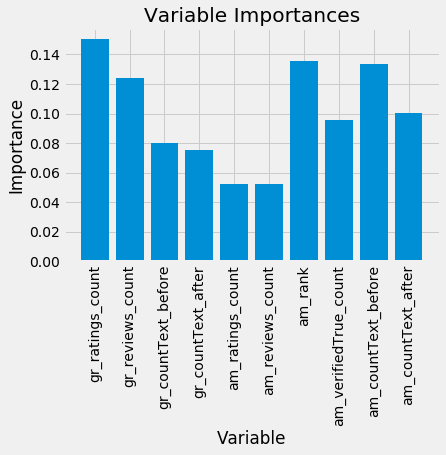

In [26]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

# Model w/ Important Variables

Select 4 most important variables from the model above (> 0.1)

In [27]:
x = am_gr_metadata_numeric[['gr_ratings_count', 'am_rank', 'am_countText_before', 'gr_reviews_count']]

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [28]:
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
# Use the forest's predict method on the train data
predictions = rf.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

Mean Absolute Error: 0.08911723750179051
Mean Squared Error: 0.0145448929128778
Root Mean Squared Error: 0.1206022094029699
R2 Score: 0.8704892111906274


In [30]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.2454043828553013
Mean Squared Error: 0.10997076278214633
Root Mean Squared Error: 0.3316183993419942
R2 Score: 0.024700807667360825


Not much improvements in MAE, MSE, or RMSE, but much worse R2. We'll stick to the first model

# Adding Numerical Features w/ Null Values

### Removing rows w/ null values

In [102]:
am_gr_metadata_numeric_all = am_gr_metadata[['asin', 'gr_ratings_count', 'gr_reviews_count', 'gr_pub_yr', 'gr_pub_mo', 
                                             'gr_pub_day', 'gr_countDes_before', 'gr_countDes_after', 
                                             'gr_countText_before', 'gr_countText_after', 'am_ratings_count', 
                                             'am_reviews_count', 'am_rank', 'am_verifiedTrue_count',
                                             'am_countText_before', 'am_countText_after', 'rating_diff']]

In [101]:
am_gr_metadata_numeric_no_null = am_gr_metadata[['asin', 'gr_ratings_count', 'gr_reviews_count', 'gr_pub_yr', 'gr_pub_mo', 
                                                 'gr_pub_day', 'gr_countDes_before', 'gr_countDes_after', 
                                                 'gr_countText_before', 'gr_countText_after', 'am_ratings_count', 
                                                 'am_reviews_count', 'am_rank', 'am_verifiedTrue_count',
                                                 'am_countText_before', 'am_countText_after', 'rating_diff']]

In [113]:
am_gr_metadata_numeric_no_null = am_gr_metadata_numeric_no_null.dropna()

In [59]:
y = np.array(am_gr_metadata_numeric_no_null['rating_diff'])
x = am_gr_metadata_numeric_no_null.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [60]:
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [61]:
# Use the forest's predict method on the train data
predictions = rf.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

Mean Absolute Error: 0.0846611545433052
Mean Squared Error: 0.013272025219906997
Root Mean Squared Error: 0.11520427604870835
R2 Score: 0.8811189988366562


In [62]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.2292194574468085
Mean Squared Error: 0.09760325171022459
Root Mean Squared Error: 0.31241519122831496
R2 Score: 0.13800737500052862


Better results than the first model!

### Replacing null values w/ mean

In [64]:
am_gr_metadata_numeric_mean = am_gr_metadata[['asin', 'gr_ratings_count', 'gr_reviews_count', 'gr_pub_yr', 'gr_pub_mo', 
                                              'gr_pub_day', 'gr_countDes_before', 'gr_countDes_after', 
                                              'gr_countText_before', 'gr_countText_after', 'am_ratings_count', 
                                              'am_reviews_count', 'am_rank', 'am_verifiedTrue_count',
                                              'am_countText_before', 'am_countText_after', 'rating_diff']]

In [65]:
am_gr_metadata_numeric_mean.isnull().sum()

gr_ratings_count            0
gr_reviews_count            0
gr_pub_yr                1445
gr_pub_mo                2012
gr_pub_day               2212
gr_countDes_before       1027
gr_countDes_after        1748
gr_countText_before         0
gr_countText_after          0
am_ratings_count            0
am_reviews_count            0
am_rank                     0
am_verifiedTrue_count       0
am_countText_before         0
am_countText_after          0
rating_diff                 0
dtype: int64

In [66]:
# Fill null values with mean
am_gr_metadata_numeric_mean['gr_pub_yr'].fillna(am_gr_metadata_numeric_mean['gr_pub_yr'].mean(), inplace=True)
am_gr_metadata_numeric_mean['gr_pub_mo'].fillna(am_gr_metadata_numeric_mean['gr_pub_mo'].mean(), inplace=True)
am_gr_metadata_numeric_mean['gr_pub_day'].fillna(am_gr_metadata_numeric_mean['gr_pub_day'].mean(), inplace=True)
am_gr_metadata_numeric_mean['gr_countDes_before'].fillna(am_gr_metadata_numeric_mean['gr_countDes_before'].mean(), inplace=True)
# If gr_countDes_after value is null, copy the value from gr_countDes_before
am_gr_metadata_numeric_mean['gr_countDes_after'] = np.where(am_gr_metadata_numeric_mean['gr_countDes_after'].isnull(), am_gr_metadata_numeric_mean['gr_countDes_before'], am_gr_metadata_numeric_mean['gr_countDes_after'])

C:\Users\Tu Lam\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Tu Lam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [67]:
am_gr_metadata_numeric_mean.isnull().sum()

gr_ratings_count         0
gr_reviews_count         0
gr_pub_yr                0
gr_pub_mo                0
gr_pub_day               0
gr_countDes_before       0
gr_countDes_after        0
gr_countText_before      0
gr_countText_after       0
am_ratings_count         0
am_reviews_count         0
am_rank                  0
am_verifiedTrue_count    0
am_countText_before      0
am_countText_after       0
rating_diff              0
dtype: int64

In [68]:
y = np.array(am_gr_metadata_numeric_mean['rating_diff'])
x = am_gr_metadata_numeric_mean.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [69]:
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [70]:
# Use the forest's predict method on the train data
predictions = rf.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

Mean Absolute Error: 0.085033401733276
Mean Squared Error: 0.01336475290201618
Root Mean Squared Error: 0.11560602450571587
R2 Score: 0.8809974263165612


In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.2316496207970781
Mean Squared Error: 0.09935238727925662
Root Mean Squared Error: 0.3152021371743165
R2 Score: 0.11887213820881204


Not better than deleting null values

### Replacing null values w/ median

In [100]:
am_gr_metadata_numeric_median = am_gr_metadata[['asin', 'gr_ratings_count', 'gr_reviews_count', 'gr_pub_yr', 'gr_pub_mo', 
                                              'gr_pub_day', 'gr_countDes_before', 'gr_countDes_after', 
                                              'gr_countText_before', 'gr_countText_after', 'am_ratings_count', 
                                              'am_reviews_count', 'am_rank', 'am_verifiedTrue_count',
                                              'am_countText_before', 'am_countText_after', 'rating_diff']]

In [73]:
# Fill null values with mean
am_gr_metadata_numeric_median['gr_pub_yr'].fillna(am_gr_metadata_numeric_median['gr_pub_yr'].median(), inplace=True)
am_gr_metadata_numeric_median['gr_pub_mo'].fillna(am_gr_metadata_numeric_median['gr_pub_mo'].median(), inplace=True)
am_gr_metadata_numeric_median['gr_pub_day'].fillna(am_gr_metadata_numeric_median['gr_pub_day'].median(), inplace=True)
am_gr_metadata_numeric_median['gr_countDes_before'].fillna(am_gr_metadata_numeric_median['gr_countDes_before'].median(), inplace=True)
# If gr_countDes_after value is null, copy the value from gr_countDes_before
am_gr_metadata_numeric_median['gr_countDes_after'] = np.where(am_gr_metadata_numeric_median['gr_countDes_after'].isnull(), am_gr_metadata_numeric_median['gr_countDes_before'], am_gr_metadata_numeric_median['gr_countDes_after'])

C:\Users\Tu Lam\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Tu Lam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [75]:
y = np.array(am_gr_metadata_numeric_median['rating_diff'])
x = am_gr_metadata_numeric_median.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [76]:
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [77]:
# Use the forest's predict method on the train data
predictions = rf.predict(x_train)

print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

Mean Absolute Error: 0.0848938977223893
Mean Squared Error: 0.013327483756474707
Root Mean Squared Error: 0.11544472164839199
R2 Score: 0.8813292786351887


In [78]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.23173690729401655
Mean Squared Error: 0.0993881135429262
Root Mean Squared Error: 0.31525880406885737
R2 Score: 0.11855529221065308


Same result as mean so nope

# Adding Categorical Variables

In [96]:
am_gr_metadata.gr_format.str.strip().str.lower()

0        paperback
1        hardcover
2        hardcover
3              NaN
4              NaN
           ...    
37228    paperback
37229    paperback
37230    paperback
37231    paperback
37232    paperback
Name: gr_format, Length: 37233, dtype: object

### gr_format

In [118]:
df = pd.get_dummies(am_gr_metadata['gr_format'].str.strip().str.lower())
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df

,audible audio,audio,audio cassette,audio cd,audio cd (unabridged),audiobook,b,big book,board book,boxed set - hardcover,...,paperback + 2 cds,paperback boxed set,softback,softcover,spiral binding in hardcover,spiral-bound,trade paperback,unbound,unknown binding,asin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000100039X
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001053655
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001061240
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,000161102X
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001711296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0312953240
37229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0312955138
37230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0312955154
37231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0312956878


In [119]:
df = pd.merge(df, am_gr_metadata_numeric_no_null, how='right', on='asin')
df

,audible audio,audio,audio cassette,audio cd,audio cd (unabridged),audiobook,b,big book,board book,boxed set - hardcover,...,gr_countDes_after,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,0,0,0,0,0,...,66.0,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,0,0,0,0,0,0,0,0,0,0,...,19.0,83,36,42,42,1910783,33,2003,887,0.28
2,0,0,0,0,0,0,0,0,0,0,...,18.0,47,28,146,146,1231410,110,5934,2615,0.51
3,0,0,0,0,0,0,0,0,0,0,...,8.0,49,22,84,84,1525356,66,3397,1565,0.64
4,0,0,0,0,0,0,0,0,0,0,...,59.0,328,140,110,110,2360259,78,4368,1957,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33833,0,0,0,0,0,0,0,0,0,0,...,20.0,219,94,13,13,443719,4,2599,1216,-0.11
33834,0,0,0,0,0,0,0,0,0,0,...,82.0,125,52,12,12,3470182,6,1489,668,0.20
33835,0,0,0,0,0,0,0,0,0,0,...,33.0,362,184,14,14,3412599,4,1456,683,-0.07
33836,0,0,0,0,0,0,0,0,0,0,...,103.0,152,76,15,15,2606128,9,968,450,-0.45


In [121]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [122]:
# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08458485893293399
Mean Squared Error: 0.013243224957660168
Root Mean Squared Error: 0.11507921166596584
R2 Score: 0.8813769703182455
Mean Absolute Error: 0.22907987588652484
Mean Squared Error: 0.09748982778485817
Root Mean Squared Error: 0.3122336109147415
R2 Score: 0.13900908944601265


Not as good as the other 2 models :( Let's try it with dummy_na=True

In [138]:
df = pd.get_dummies(am_gr_metadata['gr_format'].str.strip().str.lower(), dummy_na=True)
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df = pd.merge(df, am_gr_metadata_numeric_no_null, how='right', on='asin')
df

,audible audio,audio,audio cassette,audio cd,audio cd (unabridged),audiobook,b,big book,board book,boxed set - hardcover,...,gr_countDes_after,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,0,0,0,0,0,...,66.0,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,0,0,0,0,0,0,0,0,0,0,...,19.0,83,36,42,42,1910783,33,2003,887,0.28
2,0,0,0,0,0,0,0,0,0,0,...,18.0,47,28,146,146,1231410,110,5934,2615,0.51
3,0,0,0,0,0,0,0,0,0,0,...,8.0,49,22,84,84,1525356,66,3397,1565,0.64
4,0,0,0,0,0,0,0,0,0,0,...,59.0,328,140,110,110,2360259,78,4368,1957,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33833,0,0,0,0,0,0,0,0,0,0,...,20.0,219,94,13,13,443719,4,2599,1216,-0.11
33834,0,0,0,0,0,0,0,0,0,0,...,82.0,125,52,12,12,3470182,6,1489,668,0.20
33835,0,0,0,0,0,0,0,0,0,0,...,33.0,362,184,14,14,3412599,4,1456,683,-0.07
33836,0,0,0,0,0,0,0,0,0,0,...,103.0,152,76,15,15,2606128,9,968,450,-0.45


In [128]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [129]:
# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08457446331468196
Mean Squared Error: 0.013243460686748355
Root Mean Squared Error: 0.11508023586501878
R2 Score: 0.8813748588311482
Mean Absolute Error: 0.2290636631205674
Mean Squared Error: 0.09744965813653665
Root Mean Squared Error: 0.31216927801520866
R2 Score: 0.1393638516080845


Nope, still not as good

### gr_genres

In [137]:
df = pd.get_dummies(am_gr_metadata['gr_genres'].str.get_dummies(sep=','))
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df = pd.merge(df, am_gr_metadata_numeric_no_null, how='right', on='asin')
df

,biography,children,comics,crime,fantasy,fiction,graphic,historical fiction,history,mystery,...,comics,fantasy,fiction,history,mystery,non-fiction,poetry,romance,young-adult,asin
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,000100039X
1,1,0,1,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0001053655
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0001061240
3,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,000161102X
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0001711296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0312953240
37229,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0312955138
37230,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0312955154
37231,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0312956878


In [139]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08457446331468196
Mean Squared Error: 0.013243460686748355
Root Mean Squared Error: 0.11508023586501878
R2 Score: 0.8813748588311482
Mean Absolute Error: 0.2290636631205674
Mean Squared Error: 0.09744965813653665
Root Mean Squared Error: 0.31216927801520866
R2 Score: 0.1393638516080845


Very smol improvements. Worth the time trade-off?

### am_format

In [140]:
df = pd.get_dummies(am_gr_metadata['am_format'].str.get_dummies(sep=','))
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df = pd.merge(df, am_gr_metadata_numeric_no_null, how='right', on='asin')
df

,Accessory,Amazon Video,Audible Audiobook,Audio CD,Audio CD Library Binding,Audio Cassette,Bargain Book,Bath Book,Blu-ray,Board book,...,gr_countDes_after,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,0,0,0,0,0,...,66.0,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,0,0,0,0,0,0,0,0,0,0,...,19.0,83,36,42,42,1910783,33,2003,887,0.28
2,0,0,0,0,0,0,0,0,0,0,...,18.0,47,28,146,146,1231410,110,5934,2615,0.51
3,0,0,0,0,0,0,0,0,0,0,...,8.0,49,22,84,84,1525356,66,3397,1565,0.64
4,0,0,0,0,0,0,0,0,0,0,...,59.0,328,140,110,110,2360259,78,4368,1957,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33833,0,0,0,0,0,0,0,0,0,0,...,20.0,219,94,13,13,443719,4,2599,1216,-0.11
33834,0,0,0,0,0,0,0,0,0,0,...,82.0,125,52,12,12,3470182,6,1489,668,0.20
33835,0,0,0,0,0,0,0,0,0,0,...,33.0,362,184,14,14,3412599,4,1456,683,-0.07
33836,0,0,0,0,0,0,0,0,0,0,...,103.0,152,76,15,15,2606128,9,968,450,-0.45


In [141]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08427455000394038
Mean Squared Error: 0.013171285496709737
Root Mean Squared Error: 0.11476622106138085
R2 Score: 0.8820213508855843
Mean Absolute Error: 0.22784879905437352
Mean Squared Error: 0.09681365522851063
Root Mean Squared Error: 0.3111489277315778
R2 Score: 0.14498077324328051


Again, smol improvements. Is it worth it?

### gr_genres again but only w/ numeric variables w/o null

In [143]:
df = pd.get_dummies(am_gr_metadata['gr_genres'].str.get_dummies(sep=','))
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df = pd.merge(df, am_gr_metadata_numeric, how='right', on='asin')
df

,biography,children,comics,crime,fantasy,fiction,graphic,historical fiction,history,mystery,...,gr_reviews_count,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,1,0,0,0,0,...,8847,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,1,0,1,0,0,1,1,1,0,0,...,85,158,75,50,50,9799161,43,4888,2240,0.40
2,0,1,0,0,0,0,0,0,0,0,...,36,49,18,45,45,321557,30,3085,1326,0.25
3,1,0,0,0,0,1,0,1,1,0,...,75,130,61,17,17,1542999,13,788,399,0.49
4,0,0,0,0,1,1,0,0,0,0,...,65,257,117,107,107,2884610,69,5667,2574,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,1,0,0,0,0,0,0,...,8,219,94,13,13,443719,4,2599,1216,-0.11
37229,0,0,0,1,0,0,0,0,0,0,...,4,125,52,12,12,3470182,6,1489,668,0.20
37230,0,0,0,1,0,1,0,0,0,0,...,5,362,184,14,14,3412599,4,1456,683,-0.07
37231,0,0,0,1,0,0,0,0,0,0,...,4,152,76,15,15,2606128,9,968,450,-0.45


In [144]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08335464045265716
Mean Squared Error: 0.012957724555450498
Root Mean Squared Error: 0.11383200145587574
R2 Score: 0.8846216924110075
Mean Absolute Error: 0.22749687399291008
Mean Squared Error: 0.0969760749481362
Root Mean Squared Error: 0.3114098183232767
R2 Score: 0.1399469715430416


Better than on the model w/ all numeric variables and deleting null rows! What about for am_format?

### am_format again but on the model w/ only numeric variables w/o null

In [145]:
df = pd.get_dummies(am_gr_metadata['am_format'].str.get_dummies(sep=','))
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df = pd.merge(df, am_gr_metadata_numeric, how='right', on='asin')
df

,Accessory,Amazon Video,Audible Audiobook,Audio CD,Audio CD Library Binding,Audio Cassette,Bargain Book,Bath Book,Blu-ray,Board book,...,gr_reviews_count,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,0,0,0,0,0,...,8847,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,0,0,0,0,0,1,0,0,0,0,...,85,158,75,50,50,9799161,43,4888,2240,0.40
2,0,0,0,0,0,0,0,0,0,0,...,36,49,18,45,45,321557,30,3085,1326,0.25
3,0,0,0,0,0,0,0,0,0,0,...,75,130,61,17,17,1542999,13,788,399,0.49
4,0,0,0,0,0,0,0,0,0,0,...,65,257,117,107,107,2884610,69,5667,2574,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,0,0,0,0,0,0,0,...,8,219,94,13,13,443719,4,2599,1216,-0.11
37229,0,0,0,0,0,0,0,0,0,0,...,4,125,52,12,12,3470182,6,1489,668,0.20
37230,0,0,0,0,0,0,0,0,0,0,...,5,362,184,14,14,3412599,4,1456,683,-0.07
37231,0,0,0,0,0,0,0,0,0,0,...,4,152,76,15,15,2606128,9,968,450,-0.45


In [146]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08552603889127627
Mean Squared Error: 0.013476360132112149
Root Mean Squared Error: 0.11608772601835282
R2 Score: 0.8800036520417599
Mean Absolute Error: 0.2330514663229133
Mean Squared Error: 0.10055743831094638
Root Mean Squared Error: 0.3171079284895702
R2 Score: 0.10818488581378316


No bueno!

# Hyperparameter Tuning

Testing model w/ only numeric variables w/o null & gr_genres dummies

### Running the model again for base stats

In [162]:
df = pd.get_dummies(am_gr_metadata['gr_genres'].str.get_dummies(sep=','))
df = pd.concat([df, am_gr_metadata['asin']], axis=1)
df = pd.merge(df, am_gr_metadata_numeric, how='right', on='asin')
df

,biography,children,comics,crime,fantasy,fiction,graphic,historical fiction,history,mystery,...,gr_reviews_count,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,1,0,0,0,0,...,8847,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,1,0,1,0,0,1,1,1,0,0,...,85,158,75,50,50,9799161,43,4888,2240,0.40
2,0,1,0,0,0,0,0,0,0,0,...,36,49,18,45,45,321557,30,3085,1326,0.25
3,1,0,0,0,0,1,0,1,1,0,...,75,130,61,17,17,1542999,13,788,399,0.49
4,0,0,0,0,1,1,0,0,0,0,...,65,257,117,107,107,2884610,69,5667,2574,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,1,0,0,0,0,0,0,...,8,219,94,13,13,443719,4,2599,1216,-0.11
37229,0,0,0,1,0,0,0,0,0,0,...,4,125,52,12,12,3470182,6,1489,668,0.20
37230,0,0,0,1,0,1,0,0,0,0,...,5,362,184,14,14,3412599,4,1456,683,-0.07
37231,0,0,0,1,0,0,0,0,0,0,...,4,152,76,15,15,2606128,9,968,450,-0.45


In [163]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08335464045265716
Mean Squared Error: 0.012957724555450498
Root Mean Squared Error: 0.11383200145587574
R2 Score: 0.8846216924110075
Mean Absolute Error: 0.22749687399291013
Mean Squared Error: 0.0969760749481362
Root Mean Squared Error: 0.3114098183232767
R2 Score: 0.1399469715430416


### Testing train & test size

#### Train .7, test .30

In [164]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08330018493649997
Mean Squared Error: 0.012921206826819619
Root Mean Squared Error: 0.11367148642830188
R2 Score: 0.8848984287339166
Mean Absolute Error: 0.2283257188898836
Mean Squared Error: 0.09752724166044763
Root Mean Squared Error: 0.31229351844130165
R2 Score: 0.1352933546714019


Worse than before. Try again

#### Train .80, test .20

In [165]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08309846236486937
Mean Squared Error: 0.012860304250480082
Root Mean Squared Error: 0.1134032814802115
R2 Score: 0.8853289746951091
Mean Absolute Error: 0.22819772391567075
Mean Squared Error: 0.09891119479192964
Root Mean Squared Error: 0.3145015020503553
R2 Score: 0.1284869039974328


Smaller train error but higher test error... overfitting! But just to make sure we'll try again w/ test size = 0.15

#### Train .85, test .15

In [169]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08301732810920115
Mean Squared Error: 0.012841480941923649
Root Mean Squared Error: 0.11332025830328683
R2 Score: 0.8857275050740608
Mean Absolute Error: 0.2291078334825425
Mean Squared Error: 0.09944342592621308
Root Mean Squared Error: 0.3153465172254374
R2 Score: 0.11703387213434824


Final verdict: Keep test size at 0.25!

### Testing max_depth

In [175]:
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
print('Min:', np.min(depths))
print('Max:', np.max(depths))
print('Mean:', np.mean(depths))

Min: 36
Max: 55
Mean: 42.695


#### max_depth = 25

In [178]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=25)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.0927756507491824
Mean Squared Error: 0.01550854068846598
Root Mean Squared Error: 0.12453329148651769
R2 Score: 0.8619086885083103
Mean Absolute Error: 0.22733716564685724
Mean Squared Error: 0.09687572656451082
Root Mean Squared Error: 0.3112486571288474
R2 Score: 0.1408369326111084


Slightly worse. Try again?

#### max_depth = 30

In [179]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=30)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08507587159761228
Mean Squared Error: 0.013374986031751052
Root Mean Squared Error: 0.11565027467218161
R2 Score: 0.8809063083748967
Mean Absolute Error: 0.2275414662114504
Mean Squared Error: 0.09704414796172946
Root Mean Squared Error: 0.31151909726649096
R2 Score: 0.13934325148602356


Inconclusive. Try again

#### max_depth = 35

In [180]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=35)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08358551411005011
Mean Squared Error: 0.013008577235702251
Root Mean Squared Error: 0.11405514997448493
R2 Score: 0.8841688894394131
Mean Absolute Error: 0.22746297576128638
Mean Squared Error: 0.09698642907438298
Root Mean Squared Error: 0.31142644247780726
R2 Score: 0.13985514376345454


Better! Keep going?

#### max_depth = 40

In [181]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08338428501379277
Mean Squared Error: 0.012961609764729277
Root Mean Squared Error: 0.11384906571741939
R2 Score: 0.8845870976895889
Mean Absolute Error: 0.22742039717412388
Mean Squared Error: 0.09696634692124641
Root Mean Squared Error: 0.31139419859921347
R2 Score: 0.1400332466267873


Even better! Keep going!

#### max_depth = 45

In [183]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=45)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08336664197778339
Mean Squared Error: 0.012959129388535022
Root Mean Squared Error: 0.1138381719307501
R2 Score: 0.8846091834814462
Mean Absolute Error: 0.22747792309271986
Mean Squared Error: 0.09697623203510561
Root Mean Squared Error: 0.31141007054221226
R2 Score: 0.1399455783837099


About the same as max_depth = 40

#### max_depth = 50

In [184]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=50)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08335699822949572
Mean Squared Error: 0.012958181146893184
Root Mean Squared Error: 0.11383400698777665
R2 Score: 0.8846176268246703
Mean Absolute Error: 0.2275043061186733
Mean Squared Error: 0.09698280829695557
Root Mean Squared Error: 0.3114206292090419
R2 Score: 0.13988725540123192


Final verdict: max_depth = 40-45

### Testing n_estimators

#### n_estimators = 10

In [190]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 10, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

C:\Users\Tu Lam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Mean Absolute Error: 0.09617078677839849
Mean Squared Error: 0.01920765589483956
Root Mean Squared Error: 0.13859168768306257
R2 Score: 0.82897098789107
Mean Absolute Error: 0.24079418304866262
Mean Squared Error: 0.10671091158636803
Root Mean Squared Error: 0.326666361271509
R2 Score: 0.053611494089218836


NOPE

#### n_estimators = 50

In [191]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 500, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08346776431181384
Mean Squared Error: 0.012996581994064971
Root Mean Squared Error: 0.11400255257697071
R2 Score: 0.8842756975964554
Mean Absolute Error: 0.227461009086007
Mean Squared Error: 0.09700052373706364
Root Mean Squared Error: 0.31144907085599666
R2 Score: 0.13973014223776814


Inconclusive findings, let's continue

#### n_estimators = 100

In [192]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 100, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08464867709219694
Mean Squared Error: 0.01356433886978204
Root Mean Squared Error: 0.11646604170221482
R2 Score: 0.8792202708383141
Mean Absolute Error: 0.2289132596301863
Mean Squared Error: 0.09808164408755199
Root Mean Squared Error: 0.3131798909373844
R2 Score: 0.1301419955525035


Not as good as n_estimators = 1000

#### n_estimators = 200

In [193]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 200, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.0839231435483672
Mean Squared Error: 0.013209455778335035
Root Mean Squared Error: 0.11493239655699795
R2 Score: 0.8823802246024093
Mean Absolute Error: 0.22772712523816185
Mean Squared Error: 0.09713102715712099
Root Mean Squared Error: 0.3116585104840248
R2 Score: 0.13857274478995085


Still not as good

#### n_estimators = 500

In [194]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 500, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08346776431181384
Mean Squared Error: 0.012996581994064971
Root Mean Squared Error: 0.11400255257697071
R2 Score: 0.8842756975964554
Mean Absolute Error: 0.227461009086007
Mean Squared Error: 0.09700052373706364
Root Mean Squared Error: 0.31144907085599666
R2 Score: 0.13973014223776814


Not as good

#### n_estimators = 2000

In [195]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 2000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08330671159320875
Mean Squared Error: 0.012916231255544934
Root Mean Squared Error: 0.11364959857186005
R2 Score: 0.8849911574894556
Mean Absolute Error: 0.22742261318963328
Mean Squared Error: 0.0970342525423747
Root Mean Squared Error: 0.3115032143371472
R2 Score: 0.13943101112558876


Better train error but worse test error = overfitting

#### n_estimators = 1500

In [196]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1500, random_state = 0, oob_score=True, n_jobs=4, max_depth=40)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.08333371910261458
Mean Squared Error: 0.012927504885941847
Root Mean Squared Error: 0.11369918595109574
R2 Score: 0.884890774710827
Mean Absolute Error: 0.22744898998377627
Mean Squared Error: 0.09702377426498793
Root Mean Squared Error: 0.3114863949918005
R2 Score: 0.13952393996607182


Final verdict: n_estimators = 1000

### min_samples_split

#### min_samples_split = 5

In [197]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=5)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.09527661064360354
Mean Squared Error: 0.01811730448852929
Root Mean Squared Error: 0.134600536731951
R2 Score: 0.8386797063777922
Mean Absolute Error: 0.22740058271518235
Mean Squared Error: 0.09696536396012541
Root Mean Squared Error: 0.311392620272423
R2 Score: 0.14004196422738535


Worse train error but almost same test error. Continue to see what happens

#### min_samples_split = 10

In [199]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=10)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.12118794406662461
Mean Squared Error: 0.02855060799705045
Root Mean Squared Error: 0.1689692516319181
R2 Score: 0.7457793752877078
Mean Absolute Error: 0.227114120172975
Mean Squared Error: 0.09676171547926513
Root Mean Squared Error: 0.31106545208245984
R2 Score: 0.14184806426595908


Worse training error but better test error. Continue?

#### min_samples_split = 25

In [200]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.16195603222982016
Mean Squared Error: 0.04867164701531787
Root Mean Squared Error: 0.2206165157356037
R2 Score: 0.5666174075421244
Mean Absolute Error: 0.2266817705903992
Mean Squared Error: 0.09647297678354527
Root Mean Squared Error: 0.3106009928888594
R2 Score: 0.14440880504474796


Same findings... continue!

#### min_samples_split = 50

In [201]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=50)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.1860797326392722
Mean Squared Error: 0.06372164641524446
Root Mean Squared Error: 0.25243146874992517
R2 Score: 0.43260904422586083
Mean Absolute Error: 0.22676672542749535
Mean Squared Error: 0.09658991437222163
Root Mean Squared Error: 0.31078917994714944
R2 Score: 0.1433717190693118


Starting to overfit... back to 35

#### min_samples_split = 35

In [202]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=35)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17460785051712543
Mean Squared Error: 0.05622702540566839
Root Mean Squared Error: 0.23712238486838055
R2 Score: 0.4993427276287898
Mean Absolute Error: 0.22668867234523482
Mean Squared Error: 0.09652016389936675
Root Mean Squared Error: 0.31067694458933826
R2 Score: 0.14399031603198753


Final verdict: min_samples_split = 25

#### Testing min_samples_leaf

#### min_samples_leaf = 5

In [204]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.1718009534312613
Mean Squared Error: 0.05731074997071511
Root Mean Squared Error: 0.23939663734212122
R2 Score: 0.4896930159319076
Mean Absolute Error: 0.22638378548403246
Mean Squared Error: 0.09639114067035282
Root Mean Squared Error: 0.3104692266076508
R2 Score: 0.14513458608946384


Training error is worse but test error is better -> current best model is overfitting

#### min_samples_leaf = 10

In [205]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=10)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.18060021955496142
Mean Squared Error: 0.06302657076789636
Root Mean Squared Error: 0.2510509326170615
R2 Score: 0.4387981441325733
Mean Absolute Error: 0.2263302915452586
Mean Squared Error: 0.09633156694515613
Root Mean Squared Error: 0.31037327034581463
R2 Score: 0.14566292839244188


Final verdict: min_samples_leaf = 5

### Testing max_features

#### max_features = 'sqrt'

In [207]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features='sqrt')
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.18899399596000802
Mean Squared Error: 0.06825012869690746
Root Mean Squared Error: 0.2612472558648367
R2 Score: 0.3922864845535116
Mean Absolute Error: 0.22759975734587135
Mean Squared Error: 0.09739004081877224
Root Mean Squared Error: 0.31207377464114516
R2 Score: 0.13627562682313255


Best results yet!

#### max_features = 'log2'

In [208]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features='log2')
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.19238528946058592
Mean Squared Error: 0.0705244544068896
Root Mean Squared Error: 0.26556440726665465
R2 Score: 0.3720354095903928
Mean Absolute Error: 0.2280465832203221
Mean Squared Error: 0.09773819789014873
Root Mean Squared Error: 0.3126310891292623
R2 Score: 0.13318792149193415


Not as good as above

#### max_features = 0.5

In [209]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17598807419587292
Mean Squared Error: 0.059871253383688205
Root Mean Squared Error: 0.24468603021768162
R2 Score: 0.4668937544488868
Mean Absolute Error: 0.2260039619244125
Mean Squared Error: 0.09617133185862317
Root Mean Squared Error: 0.31011503004308444
R2 Score: 0.14708400747314754


Best one so far!

#### max_features = 0.75

In [210]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.75)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17327649241228937
Mean Squared Error: 0.058188298199374065
Root Mean Squared Error: 0.2412225076550156
R2 Score: 0.48187914174303237
Mean Absolute Error: 0.22615719120000355
Mean Squared Error: 0.09618881724054015
Root Mean Squared Error: 0.3101432205297097
R2 Score: 0.14692893462987688


Overfitting!

#### max_features = 2/3

In [211]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=(2/3))
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17399876150778526
Mean Squared Error: 0.05860421266992674
Root Mean Squared Error: 0.2420830697713633
R2 Score: 0.47817575172970217
Mean Absolute Error: 0.22600042006505155
Mean Squared Error: 0.09620045733576427
Root Mean Squared Error: 0.3101619856393821
R2 Score: 0.14682570195981492


Inconclusive

#### max_features = 1/3

In [212]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=(1/3))
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17961158774353347
Mean Squared Error: 0.06210900691840913
Root Mean Squared Error: 0.24921678699158514
R2 Score: 0.4469683258342786
Mean Absolute Error: 0.22622488356963383
Mean Squared Error: 0.09633826315073138
Root Mean Squared Error: 0.31038405750091513
R2 Score: 0.14560354166342415


Final verdict: max_features = .5

### Testing max_leaf_nodes

#### max_leaf_nodes = 50

In [215]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=50)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.2269880460845918
Mean Squared Error: 0.09541509822578721
Root Mean Squared Error: 0.308893344418081
R2 Score: 0.15040387649712128
Mean Absolute Error: 0.2327939085937391
Mean Squared Error: 0.10092311148187985
Root Mean Squared Error: 0.3176839805244826
R2 Score: 0.10494183521336453


Nope!

#### max_leaf_nodes = 100

In [214]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=100)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.22216063390048135
Mean Squared Error: 0.09081029569131203
Root Mean Squared Error: 0.3013474667079716
R2 Score: 0.19140600776914074
Mean Absolute Error: 0.23099824823059478
Mean Squared Error: 0.09959585542644278
Root Mean Squared Error: 0.3155881104009509
R2 Score: 0.11671288895653775


Better but still NOPE

#### max_leaf_nodes = 500

In [216]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=500)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.19976689937887224
Mean Squared Error: 0.0727097341334275
Root Mean Squared Error: 0.26964742560133503
R2 Score: 0.35257721881179477
Mean Absolute Error: 0.22737542108195785
Mean Squared Error: 0.09695059929862015
Root Mean Squared Error: 0.31136891190133315
R2 Score: 0.14017290778071578


#### max_leaf_nodes = 1000

In [217]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=1000)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.18291679179208678
Mean Squared Error: 0.06273639042120896
Root Mean Squared Error: 0.2504723346423891
R2 Score: 0.44138197103467364
Mean Absolute Error: 0.22628649842416418
Mean Squared Error: 0.09628971296226578
Root Mean Squared Error: 0.3103058377830907
R2 Score: 0.1460341193769925


Getting better but still nope

#### max_leaf_nodes = 5000

In [218]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=5000)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17598423893879164
Mean Squared Error: 0.059822156275163955
Root Mean Squared Error: 0.24458568289081017
R2 Score: 0.46733092544019783
Mean Absolute Error: 0.22599937293715203
Mean Squared Error: 0.0961326180925619
Root Mean Squared Error: 0.31005260536328655
R2 Score: 0.14742734877420327


Better than no max_leaf_nodes specified

#### max_leaf_nodes = 10000

In [219]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=10000)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17598423893879164
Mean Squared Error: 0.059822156275163955
Root Mean Squared Error: 0.24458568289081017
R2 Score: 0.46733092544019783
Mean Absolute Error: 0.22599937293715203
Mean Squared Error: 0.0961326180925619
Root Mean Squared Error: 0.31005260536328655
R2 Score: 0.14742734877420327


Final verdict: max_leaf_nodes = 5000

# Using gr_genres and am_format dummies

In [220]:
df

,biography,children,comics,crime,fantasy,fiction,graphic,historical fiction,history,mystery,...,gr_reviews_count,gr_countText_before,gr_countText_after,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after,rating_diff
0,0,0,0,0,0,1,0,0,0,0,...,8847,42320,17834,1453,1453,1810945,1130,69909,31772,0.41
1,1,0,1,0,0,1,1,1,0,0,...,85,158,75,50,50,9799161,43,4888,2240,0.40
2,0,1,0,0,0,0,0,0,0,0,...,36,49,18,45,45,321557,30,3085,1326,0.25
3,1,0,0,0,0,1,0,1,1,0,...,75,130,61,17,17,1542999,13,788,399,0.49
4,0,0,0,0,1,1,0,0,0,0,...,65,257,117,107,107,2884610,69,5667,2574,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,1,0,0,0,0,0,0,...,8,219,94,13,13,443719,4,2599,1216,-0.11
37229,0,0,0,1,0,0,0,0,0,0,...,4,125,52,12,12,3470182,6,1489,668,0.20
37230,0,0,0,1,0,1,0,0,0,0,...,5,362,184,14,14,3412599,4,1456,683,-0.07
37231,0,0,0,1,0,0,0,0,0,0,...,4,152,76,15,15,2606128,9,968,450,-0.45


In [221]:
df2 = pd.get_dummies(am_gr_metadata['am_format'].str.get_dummies(sep=','))
df2

,Accessory,Amazon Video,Audible Audiobook,Audio CD,Audio CD Library Binding,Audio Cassette,Bargain Book,Bath Book,Blu-ray,Board book,...,Spiral-bound,Staple Bound,Textbook Binding,Toy,Turtleback,Unbound,Unknown Binding,VHS Tape,Vinyl,Vinyl Bound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
df = pd.concat([df, df2], axis=1)
df

,biography,children,comics,crime,fantasy,fiction,graphic,historical fiction,history,mystery,...,Spiral-bound,Staple Bound,Textbook Binding,Toy,Turtleback,Unbound,Unknown Binding,VHS Tape,Vinyl,Vinyl Bound
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37229,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37230,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37231,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
y = np.array(df['rating_diff'])
x = df.drop('asin', axis=1).drop('rating_diff', axis=1)

# Saving feature names for later use
features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0, oob_score=True, n_jobs=4, max_depth=40, min_samples_split=25,
                          min_samples_leaf=5, max_features=0.5, max_leaf_nodes=5000)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 Score:', rf.score(x_train, y_train))

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', rf.score(x_test, y_test))

Mean Absolute Error: 0.17523464619784684
Mean Squared Error: 0.05937160867325297
Root Mean Squared Error: 0.24366289966519927
R2 Score: 0.4713426961468766
Mean Absolute Error: 0.2254487360514314
Mean Squared Error: 0.0956595884830423
Root Mean Squared Error: 0.30928884312733024
R2 Score: 0.15162251287457262


Final verdict: Could be better? Inconclusive

# Conclusion

Best models tested: <br/>
Ties between 1, 2. Models 1,2,3 are only slightly better than models 4 & 5. Trade-offs?
1. Only numeric variables w/o null, gr_genres dummies, 1000 trees, .25 test <br/>
Train: MAE 0.0834, MSE 0.0130, RMSE 0.1138, R2 0.8846 <br/>
Test: MAE 0.2275, MSE 0.0970, RMSE 0.3114, R2 0.1399 <br/>
2. All numeric variables, am_format dummies, delete null rows (NOTE: MIGHT BE AN ISSUE IF # ROWS > SOME %), 1000 trees, .25 test <br/>
Train: MAE 0.0843, MSE: 0.0132, RMSE 0.1148, R2 0.8820 <br/>
Test: MAE 0.2278, MSE: 0.0968, RMSE 0.3111, R2 0.1450 <br/>
3. All numeric variables, gr_genres dummies, delete null rows (NOTE: MIGHT BE AN ISSUE IF # NULL ROWS > SOME %), 1000 trees, .25 test <br/>
Train: MAE 0.0846, MSE 0.0132, RMSE 0.1151, R2 0.8814 <br/>
Test: MAE 0.2291, MSE 0.0974, RMSE 0.3122, R2: 0.1394 <br/>
4. All numeric variables, delete null rows (NOTE: MIGHT BE AN ISSUE IF # NULL ROWS > SOME %), 1000 trees, .25 test <br/>
Train: MAE 0.0847, MSE 0.0133, RMSE 0.1152, R2 0.8811 <br/>
Test: MAE 0.2316, MSE 0.0994, RMSE 0.3152, R2 0.1189 <br/>
5. Only numeric variables w/o null, 1000 trees, .25 test <br/>
Train: MAE 0.0864, MSE 0.0137, RMSE 0.1171, R2 0.8779  <br/>
Test: MAE 0.2344, MSE 0.1015, RMSE 0.3187, R2 0.0994 

Best hyperparameter tuning: <br/>
Training on model #1 in best models tested <br/>
Train: MAE 0.1760, MSE 0.0598, RMSE 0.2446, R2 0.46733 <br/>
Test: MAE 0.2260, MSE 0.0961, RMSE 0.3101, R2 0.1474 <br/>
1. n_estimators = 1000
2. test size = .25
3. max_depth = 40-45
4. min_samples_split = 25
5. min_samples_leaf = 5
6. max_features = .5
7. max_leaf_nodes = 5000
